# XML + MatPlotLib

- Read the XML file
- Plot the detector using `imshow` of `matplotlib`.
- Note that the detector data is in `<root tag>/Data/Detector`.
- NB: `imshow` needs a `numpy.array` of the type `float/double`.


In [27]:
# Choose your backend (the way the plots are rendered in a notebook)
%matplotlib notebook

# Do the imports
import os
import matplotlib.pyplot as plt 
import numpy as np
import xml.etree.ElementTree as ET

In [2]:
# Let's see where we are:
os.getcwd()

'/SNS/users/rhf/git/IPythonNotebookTutorial/solutions'

In [3]:
file_name = "../Data/XML/f1.xml"

In [4]:
# does the file exists?
os.path.isfile(file_name)

True

In [5]:
#Let's have a look at the file:
!head -20 $file_name

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="sansstyle.xsl"?>
<SPICErack SPICE_version="1.7" filename="CG2_exp206_scan0021_0001.xml" start_time="2017-06-13 23:21:26" end_time="2017-06-14 01:22:10">
  <Header>
    <Instrument>CG2</Instrument>
    <Start_Time>2017-06-13 23:21:26</Start_Time>
    <End_Time>2017-06-14 01:22:10</End_Time>
    <Experiment_Title>Beamline calibration activities</Experiment_Title>
    <Experiment_number type="INT32">206</Experiment_number>
    <IPTS_number>828</IPTS_number>
    <Cycle_Number>473</Cycle_Number>
    <Command>scan n=@(__active_setup.frame_count)-1 preset time @(__active_setup.scan_time)</Command>
    <Users>Lakeisha Walker, Shuo Qian, Daisuke Sawada, Yuri Melnichenko, William Heller, Lowell Crow, Gary Lynn, George Wignall, Lilin He, Volker Urban, Ryan Oliver, Durgesh Rai, Hugh O'Neill, Ken Littrell, Katherine Bailey, Sai Venkatesh Pingali, Lisa Debeer-Schmitt</Users>
    <Local_Contact>LDS, KMB</Local_Contact>
    

In [6]:
# Let's initilize it and get the `root` node = SPICErack
tree = ET.parse(file_name)
root = tree.getroot()

In [7]:
# Print the root attributes (compare with XML file)
root.attrib

{'SPICE_version': '1.7',
 'end_time': '2017-06-14 01:22:10',
 'filename': 'CG2_exp206_scan0021_0001.xml',
 'start_time': '2017-06-13 23:21:26'}

In [8]:
# With XPath let's get the Users
users = root.find('Header/Users')
users.text

"Lakeisha Walker, Shuo Qian, Daisuke Sawada, Yuri Melnichenko, William Heller, Lowell Crow, Gary Lynn, George Wignall, Lilin He, Volker Urban, Ryan Oliver, Durgesh Rai, Hugh O'Neill, Ken Littrell, Katherine Bailey, Sai Venkatesh Pingali, Lisa Debeer-Schmitt"

In [9]:
# Using Xpath let's get the Detector data
# Every line in the file is a detector tube
detector = root.find('Data/Detector')
# Show only the first 1000 characters
detector.text[:1000]

'\n347\t579\t1158\t1295\t1730\t2178\t2391\t2468\t2437\t2396\t2402\t2397\t2432\t2382\t2389\t2395\t2402\t2328\t2454\t2400\t2360\t2390\t2391\t2256\t2302\t2391\t2324\t2413\t2305\t2472\t2387\t2413\t2312\t2448\t2361\t2299\t2428\t2241\t2345\t2308\t2346\t2361\t2480\t2343\t2391\t2390\t2414\t2404\t2427\t2352\t2267\t2435\t2318\t2417\t2422\t2365\t2367\t2411\t2412\t2414\t2374\t2439\t2451\t2424\t2376\t2331\t2399\t2372\t2412\t2397\t2512\t2377\t2400\t2494\t2370\t2333\t2364\t2405\t2419\t2375\t2398\t2303\t2497\t2405\t2353\t2481\t2314\t2415\t2399\t2410\t2465\t2426\t2439\t2445\t2379\t2476\t2359\t2444\t2459\t2500\t2385\t2493\t2392\t2418\t2390\t2504\t2380\t2346\t2416\t2399\t2363\t2341\t2471\t2415\t2420\t2357\t2378\t2455\t2377\t2363\t2381\t2339\t2414\t2473\t2389\t2419\t2410\t2504\t2501\t2351\t2505\t2433\t2413\t2468\t2434\t2329\t2305\t2381\t2424\t2350\t2394\t2353\t2424\t2430\t2323\t2428\t2495\t2460\t2427\t2408\t2512\t2457\t2231\t2361\t2365\t2404\t2405\t2423\t2358\t2319\t2461\t2389\t2290\t2360\t2376\t2415\t238

In [10]:
# Let's first split the text by `\n`. It is a column of the detector every line in the XML tag.
columns = detector.text.split('\n')
columns[0:2]

['',
 '347\t579\t1158\t1295\t1730\t2178\t2391\t2468\t2437\t2396\t2402\t2397\t2432\t2382\t2389\t2395\t2402\t2328\t2454\t2400\t2360\t2390\t2391\t2256\t2302\t2391\t2324\t2413\t2305\t2472\t2387\t2413\t2312\t2448\t2361\t2299\t2428\t2241\t2345\t2308\t2346\t2361\t2480\t2343\t2391\t2390\t2414\t2404\t2427\t2352\t2267\t2435\t2318\t2417\t2422\t2365\t2367\t2411\t2412\t2414\t2374\t2439\t2451\t2424\t2376\t2331\t2399\t2372\t2412\t2397\t2512\t2377\t2400\t2494\t2370\t2333\t2364\t2405\t2419\t2375\t2398\t2303\t2497\t2405\t2353\t2481\t2314\t2415\t2399\t2410\t2465\t2426\t2439\t2445\t2379\t2476\t2359\t2444\t2459\t2500\t2385\t2493\t2392\t2418\t2390\t2504\t2380\t2346\t2416\t2399\t2363\t2341\t2471\t2415\t2420\t2357\t2378\t2455\t2377\t2363\t2381\t2339\t2414\t2473\t2389\t2419\t2410\t2504\t2501\t2351\t2505\t2433\t2413\t2468\t2434\t2329\t2305\t2381\t2424\t2350\t2394\t2353\t2424\t2430\t2323\t2428\t2495\t2460\t2427\t2408\t2512\t2457\t2231\t2361\t2365\t2404\t2405\t2423\t2358\t2319\t2461\t2389\t2290\t2360\t2376\t2415\

In [11]:
# Remove empty collumns. There's a '\n' at the beginning and end of the Tag.text
# Let's get rid of it!
columns = [column for column in columns if column != '']
columns[0]

'347\t579\t1158\t1295\t1730\t2178\t2391\t2468\t2437\t2396\t2402\t2397\t2432\t2382\t2389\t2395\t2402\t2328\t2454\t2400\t2360\t2390\t2391\t2256\t2302\t2391\t2324\t2413\t2305\t2472\t2387\t2413\t2312\t2448\t2361\t2299\t2428\t2241\t2345\t2308\t2346\t2361\t2480\t2343\t2391\t2390\t2414\t2404\t2427\t2352\t2267\t2435\t2318\t2417\t2422\t2365\t2367\t2411\t2412\t2414\t2374\t2439\t2451\t2424\t2376\t2331\t2399\t2372\t2412\t2397\t2512\t2377\t2400\t2494\t2370\t2333\t2364\t2405\t2419\t2375\t2398\t2303\t2497\t2405\t2353\t2481\t2314\t2415\t2399\t2410\t2465\t2426\t2439\t2445\t2379\t2476\t2359\t2444\t2459\t2500\t2385\t2493\t2392\t2418\t2390\t2504\t2380\t2346\t2416\t2399\t2363\t2341\t2471\t2415\t2420\t2357\t2378\t2455\t2377\t2363\t2381\t2339\t2414\t2473\t2389\t2419\t2410\t2504\t2501\t2351\t2505\t2433\t2413\t2468\t2434\t2329\t2305\t2381\t2424\t2350\t2394\t2353\t2424\t2430\t2323\t2428\t2495\t2460\t2427\t2408\t2512\t2457\t2231\t2361\t2365\t2404\t2405\t2423\t2358\t2319\t2461\t2389\t2290\t2360\t2376\t2415\t2389\

In [12]:
# Every row in the text still has a `\t` separating the count in every pixel
colummns_ready = np.array([column.split('\t') for column in columns])
colummns_ready[0]

array(['347', '579', '1158', '1295', '1730', '2178', '2391', '2468',
       '2437', '2396', '2402', '2397', '2432', '2382', '2389', '2395',
       '2402', '2328', '2454', '2400', '2360', '2390', '2391', '2256',
       '2302', '2391', '2324', '2413', '2305', '2472', '2387', '2413',
       '2312', '2448', '2361', '2299', '2428', '2241', '2345', '2308',
       '2346', '2361', '2480', '2343', '2391', '2390', '2414', '2404',
       '2427', '2352', '2267', '2435', '2318', '2417', '2422', '2365',
       '2367', '2411', '2412', '2414', '2374', '2439', '2451', '2424',
       '2376', '2331', '2399', '2372', '2412', '2397', '2512', '2377',
       '2400', '2494', '2370', '2333', '2364', '2405', '2419', '2375',
       '2398', '2303', '2497', '2405', '2353', '2481', '2314', '2415',
       '2399', '2410', '2465', '2426', '2439', '2445', '2379', '2476',
       '2359', '2444', '2459', '2500', '2385', '2493', '2392', '2418',
       '2390', '2504', '2380', '2346', '2416', '2399', '2363', '2341',
       '

In [13]:
# The type is string (`U` = unicode)
colummns_ready.dtype

dtype('<U4')

In [14]:
# Let's convert the type to float
colummns_ready = colummns_ready.astype(float)
colummns_ready.dtype

dtype('float64')

In [15]:
# Let's make sure de shape is what we expect: 192 tubes, 256 pixels in every tube
colummns_ready.shape

(192, 256)

<IPython.core.display.Javascript object>


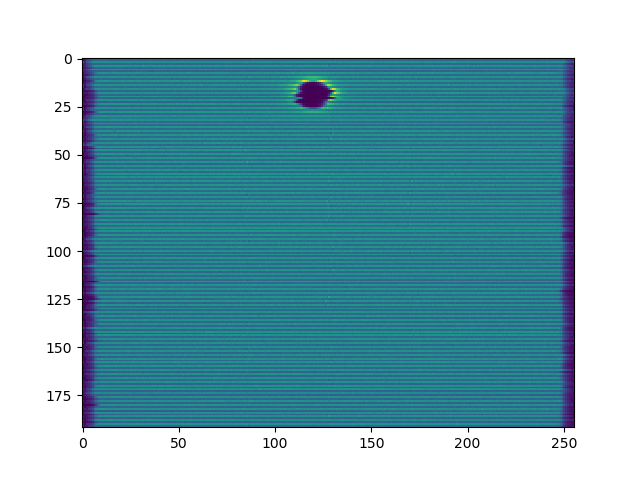

In [16]:
# Let's plot it
fig, ax = plt.subplots()
ax.imshow(colummns_ready)

<IPython.core.display.Javascript object>


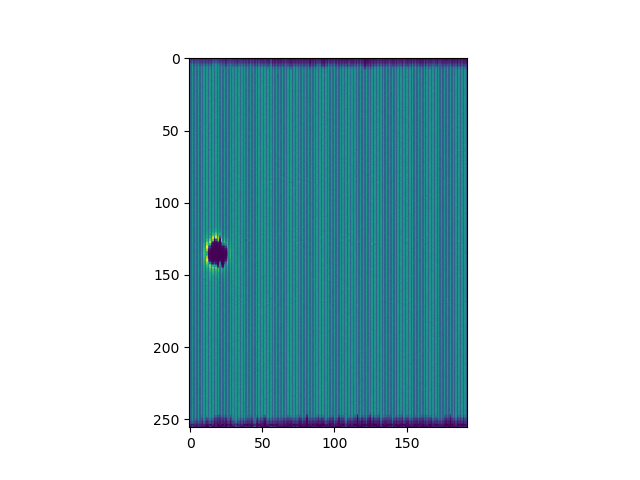

In [26]:
# Let's get the tubes vertically aligned
fig, ax = plt.subplots()
ax.imshow(
    np.rot90(colummns_ready)
)

<IPython.core.display.Javascript object>


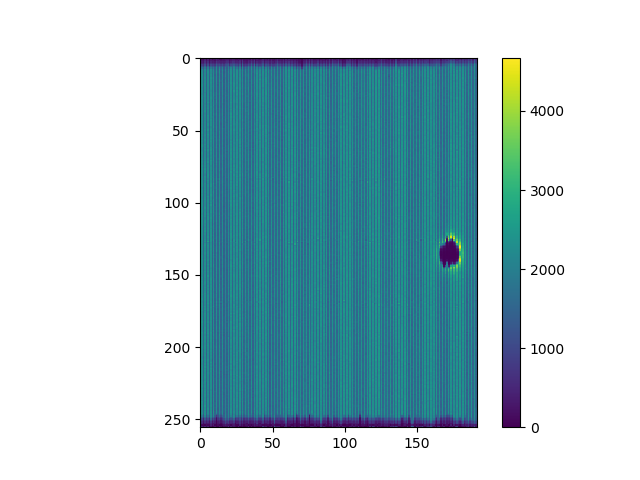

In [18]:
# Let's flip in X! (Not sure if this is needed)
fig, ax = plt.subplots()
image = ax.imshow(
    np.flip(
        np.rot90(colummns_ready),
        axis=1
    )
)
fig.colorbar(image)

## Homework

If you want to modify the file, e.g., adding a new attribute, here is one way of doing it:


In [19]:
users.attrib

{}

In [20]:
users.attrib["type"]="STRING"
users.attrib

{'type': 'STRING'}

In [24]:
# visualize the content
!cat $file_name | grep --color Users

    <Users>Lakeisha Walker, Shuo Qian, Daisuke Sawada, Yuri Melnichenko, William Heller, Lowell Crow, Gary Lynn, George Wignall, Lilin He, Volker Urban, Ryan Oliver, Durgesh Rai, Hugh O'Neill, Ken Littrell, Katherine Bailey, Sai Venkatesh Pingali, Lisa Debeer-Schmitt</Users>


In [22]:
# Let's save our XML Tree as a new file.
new_file_path = '/tmp/my_new_file.xml'
fh = open(new_file_path, 'w')
tree.write(fh, encoding='unicode')
fh.close()

In [25]:
# visualize the content
!cat $new_file_path | grep --color Users

    <Users type="STRING">Lakeisha Walker, Shuo Qian, Daisuke Sawada, Yuri Melnichenko, William Heller, Lowell Crow, Gary Lynn, George Wignall, Lilin He, Volker Urban, Ryan Oliver, Durgesh Rai, Hugh O'Neill, Ken Littrell, Katherine Bailey, Sai Venkatesh Pingali, Lisa Debeer-Schmitt</Users>
